In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/GANs/mnist_test.csv')
df2 = pd.read_csv('/content/drive/MyDrive/GANs/mnist_train.csv')
df = pd.concat([df1, df2],axis=0)
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(70000, 785)

In [4]:
x = df.drop(['label'],axis=1)
y = df['label']

In [5]:
y.value_counts()

,count
label,
1,7877
7,7293
3,7141
2,6990
9,6958
0,6903
6,6876
8,6825
4,6824


In [6]:
x /= 255

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# 1-bulid Generator

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

In [10]:
Generator = Sequential([
    Dense(128, input_shape=(100,),activation='relu'),
    Dense(256,activation='relu'),
    Dense(512,activation='relu'),
    Dense(784,activation='tanh')
])

Generator.compile(optimizer='adam',loss='binary_crossentropy')

In [11]:
Generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │         402,192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 579,728 (2.21 MB)

 Trainable params: 579,728 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

#build Discriminator

In [12]:
Discriminator = Sequential([
    Dense(512,input_shape=(784,),activation='relu'),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

Discriminator.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
Discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 574,465 (2.19 MB)

 Trainable params: 574,465 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

#create GAN

In [14]:
GAN = Sequential([
    Input(shape=(100,)),
    Generator,
    Discriminator
])

GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [15]:
GAN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 784)                 │         579,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 1)                   │         574,465 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,154,193 (4.40 MB)

 Trainable params: 1,154,193 (4.40 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
epochs = 10
batch_size = 25

In [ ]:
for epoch in range(epochs):
  for _ in range(batch_size):

    noise = np.random.normal(0,1,[batch_size,100]) # create 256 noise img with shape 100

    generated_img = Generator.predict(noise) # generate 256 from noises

    real_img = X_train[np.random.randint(low = 0, high = X_train.shape[0], size = batch_size)] # get 256 real img

    Discriminator.trainable = True

    data = np.concatenate([generated_img,real_img])

    y = np.zeros(batch_size*2)
    y[batch_size:] = 1

    Discriminator.trainable = True
    Discriminator.train_on_batch(data,y)
    Discriminator.trainable = False

    noise = np.random.normal(0,1,[batch_size,100])

    y = np.ones(batch_size)

    GAN.train_on_batch(noise,y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


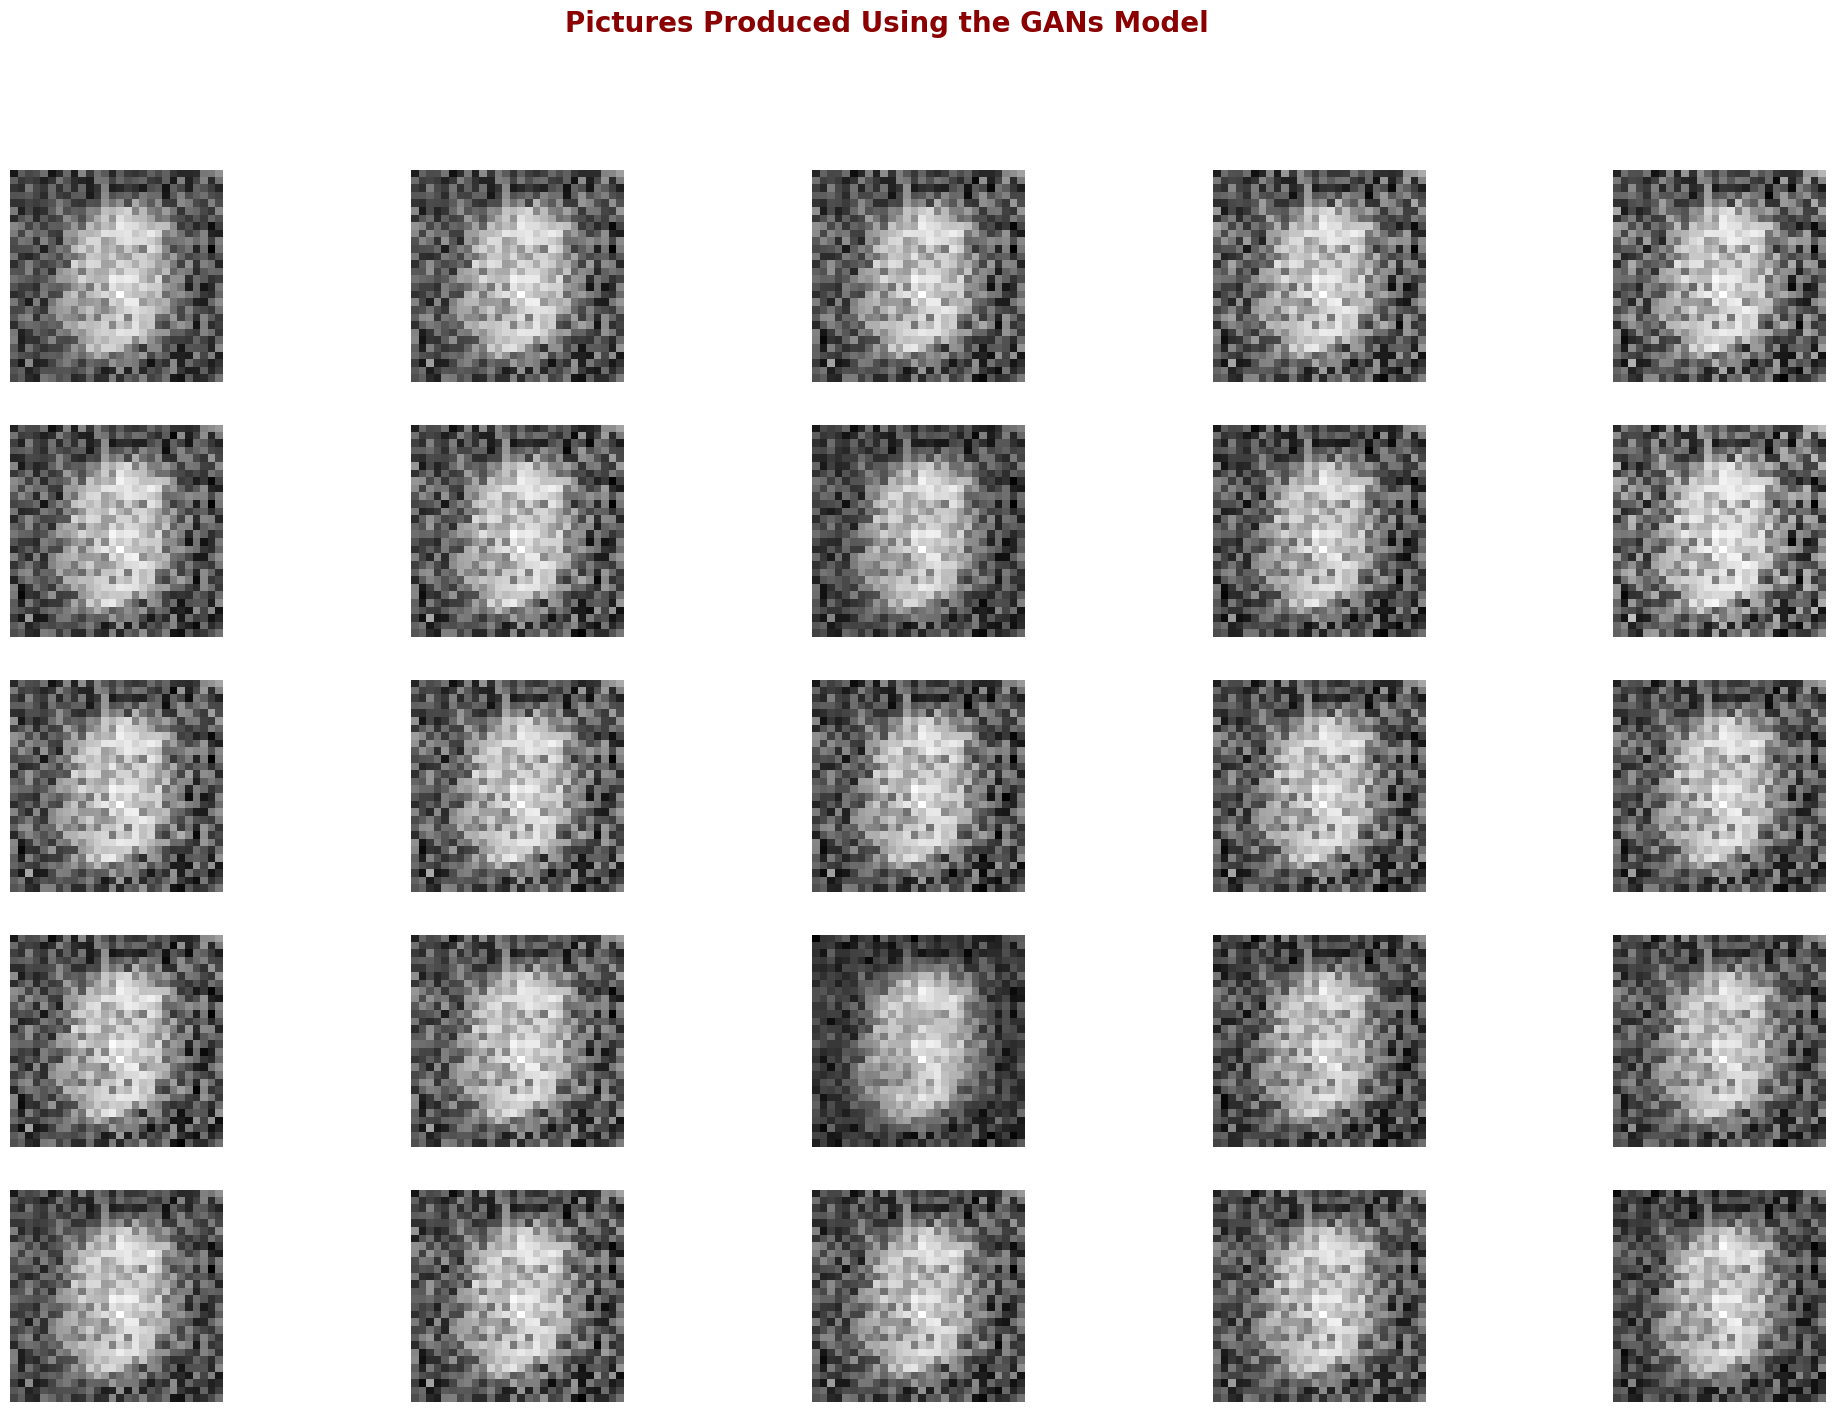

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,16))
noise= np.random.normal(loc=0, scale=1, size=[100, 100])
generated_images = Generator.predict(noise)  # 100 image , every one vector contain 784 pixel
generated_images = generated_images.reshape(100,28,28)

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(generated_images[i], interpolation='nearest', cmap = "gray")
    plt.axis('off')

plt.suptitle("Pictures Produced Using the GANs Model", fontsize = 20 , color = "darkred", fontweight = 'bold')
plt.show()